# Taller Ciencia Viva 2024 - Departamento de Computación #
## Aprendizaje automático (Machine Learning) ##

### Objetivo: Hacer un clasificador de figuras en tiempo real.

Durante este taller utilizaremos las siguientes bibliotecas:

-  __[OpenCV](https://opencv.org/)__ : la utilizaremos para realizar el procesamiento de las imágenes
-  __[scikit-learn](https://scikit-learn.org/stable/)__ : la utilizaremos para importar distintos algoritmos de aprendizaje supervisado y obtener herramientas para obtener métricas de nuestros resultados.
-  __[numpy](https://numpy.org/)__ : la utilizaremos para realizar operaciones matriciales y la manipulación de las imágenes.
-  __[matplotlib](https://matplotlib.org/)__ : la utilizaremos para realizar gráficas.

Lo primero será importar las bibliotecas en nuestro nuestro script:

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from IPython.display import display
from PIL import Image

## Procesamiento de imágenes

### Leer la imagen

El primer paso es procesar la imágenes que ya obtuvieron con la cámara y vamos a leer en escala de grises con el siguiente comando:

_Selecciona el parámetro correcto para leer la imagen en escala de grises._ 
__[imread](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)__

*Nota: Deben cambiar la ubicación y el nombre con el que guardaron sus imágenes. :)*

La imagen tiene 480 filas y 640 columnas
Imagen en escala de grises


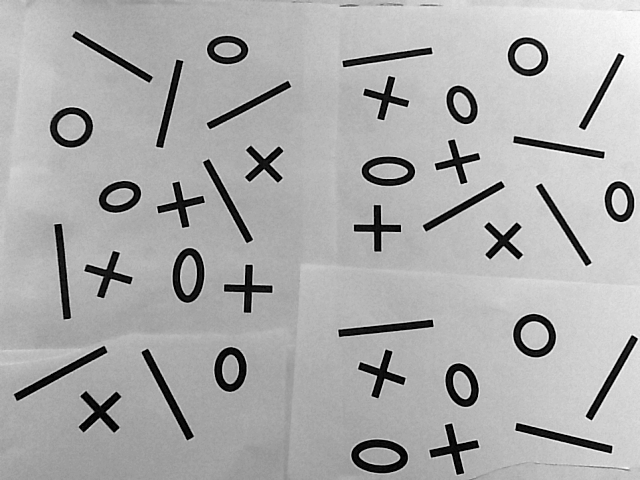

In [37]:
nombre = "img/1.png"
parametro = cv2.IMREAD_GRAYSCALE
Img1 = cv2.imread( nombre, parametro )
rows, cols = Img1.shape
print("La imagen tiene {} filas y {} columnas".format(rows, cols))


print("Imagen en escala de grises")
display(Image.fromarray(Img1))

### Binarización de la imagen
<a id="section_ID"></a>
Ahora vamos binarizar la imagen, para eso es necesario buscar un umbral con el que las figuras de la imagen que leímos se ven completamente blancas.

_Debes buscar cuáles son los mejores valores para los umbrales._ 

Imagen binarizada


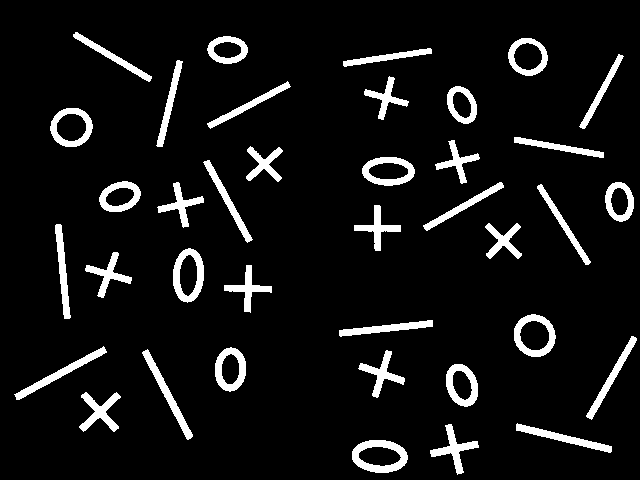

In [38]:
limInferior = 60
limSuperior = 255

ret,thresh1 = cv2.threshold(Img1,limInferior, limSuperior,cv2.THRESH_BINARY_INV)
print("Imagen binarizada")
display(Image.fromarray(thresh1))

### Extracción de figuras de la imagen

Ahora debemos extraer todas las figuras de nuestra imagen binarizada.

_Debes verificar la carpeta en donde se van a guardar las imágenes._

In [39]:
n, Labels, stats, centroids = cv2.connectedComponentsWithStats( thresh1 )

print( "Se encontraron {} figuras".format(n) )
momentos = np.zeros((n, 7))

print("Los momentos de Hu de cada figura son los siguientes:")

i = 0
while i < n :
    #Se obtiene el perimetro
    x1 =  stats[i, cv2.CC_STAT_LEFT]
    y1 =  stats[i, cv2.CC_STAT_TOP]
    x2 = x1 + stats[i,cv2.CC_STAT_WIDTH]
    y2 = y1 + stats[i,cv2.CC_STAT_HEIGHT]
    #Se toman las esquinas de un rectangulo de la imagen binarizada y solo se analiza esa región
    Img2 = thresh1[y1:y2,x1:x2]
    mu = cv2.moments( Img2, True )
    hu = cv2.HuMoments(mu)
    momentos[i, :] = hu[:, 0]
    print("Figura {}".format(i))
    j=0
    while j < 7 :
        print( "{0:.05g}".format( hu[j,0] ), end=" " )
        j += 1
    print( )
        
    #display(Image.fromarray(Img2))
    #print(Img2)
    
    nombre = "I1/{0:02d}.png".format(i)
    cv2.imwrite( nombre, thresh1[y1:y2,x1:x2] )
    i += 1

np.savetxt("I1/momentosHu.txt", momentos)
    

Se encontraron 39 figuras
Los momentos de Hu de cada figura son los siguientes:
Figura 0
1.9567 0.402 0.053936 0.0065375 0.00011645 -0.0019173 -3.884e-05 
Figura 1
1.1654 1.3305 0.00014379 0.00013408 1.8617e-08 0.00015443 4.199e-11 
Figura 2
0.37338 0.015672 1.1079e-05 6.4842e-07 -1.5905e-12 -8.1173e-08 -7.0034e-13 
Figura 3
0.46002 0.0016811 1.1367e-05 4.1453e-05 -8.9486e-10 -1.6373e-06 -9.4349e-11 
Figura 4
1.2525 1.5413 0.00038006 0.00034533 1.251e-07 0.00042211 -1.2233e-09 
Figura 5
1.126 1.24 0.0013292 0.001072 1.2789e-06 0.0011436 4.4932e-08 
Figura 6
1.1268 1.2419 6.5729e-05 2.7547e-05 1.1037e-09 2.0687e-05 3.9473e-10 
Figura 7
0.34369 0.00012571 2.6918e-05 1.0643e-06 -4.9708e-12 -8.5838e-09 -2.7829e-12 
Figura 8
1.201 1.4146 0.0003481 0.00022097 6.0858e-08 0.00022654 7.2279e-09 
Figura 9
0.38248 0.014607 6.4341e-06 5.1734e-07 -2.3588e-13 3.2145e-08 9.1389e-13 
Figura 10
0.4435 0.0010577 2.0971e-06 3.3594e-06 -7.9965e-12 -1.0745e-07 -3.9444e-12 
Figura 11
1.2704 1.5861 3.2082e-0

### Rotar imágenes
Una vez que termines deberás realizar lo siguiente:
-  Debes regresar a la sección de [binarización](#section_ID) y debes rotar la imagen 2 veces (-90 y 90), antes de realizar la binarización de la imagen. __[Función para rotar la imgen](https://www.geeksforgeeks.org/python-opencv-cv2-rotate-method/)__

### Etiquetar los datos obtenidos
-  Una vez termines de rotar las imagenes, deberás tener 3 carpetas (con el nombre que hayas decidido) con todas las imágenes de las figuras que extrajiste y también 3 archivos donde están guardados los momentos de Hu.
- Debes abrir la carpeta donde estén todas las imágenes y dependiendo del número de clases: